In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Read the raw file
with open('./data/NEW-DATA-2.T15.txt', 'r') as file:
    lines = file.readlines()

In [3]:
# Extract clean column names from the header
header = lines[0].strip()
column_names = []
for col in header.split():
    if ':' in col:
        column_names.append(col.split(':', 1)[1])  # Get part after colon


In [4]:
# Process data rows
data_rows = []
for line in lines[1:]:
    if line.strip():  # Skip empty lines
        values = line.strip().split()
        if len(values) == len(column_names):
            data_rows.append(values)

Initial Overview/Missing Values: Created the DataFrame, printed its head/shape, and used df.isnull().sum().

In [5]:
# Create DataFrame
df = pd.DataFrame(data_rows, columns=column_names)

# Display the DataFrame
print("Dataframe with clean column names:")
df.head()


Dataframe with clean column names:


,Date,Time,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,...,Meteo_Exterior_Sol_Oest,Meteo_Exterior_Sol_Est,Meteo_Exterior_Sol_Sud,Meteo_Exterior_Piranometro,Exterior_Entalpic_1,Exterior_Entalpic_2,Exterior_Entalpic_turbo,Temperature_Exterior_Sensor,Humedad_Exterior_Sensor,Day_Of_Week
0,18/04/2012,00:00,20.2,19.8,13,207.84,206.56,31.58,30.16,11.72,...,0,0,0,-3.12,0,0,0,16.07,39.08,3
1,18/04/2012,00:15,20.1593,19.76,13,207.499,206.101,31.624,30.0613,11.524,...,0,0,0,-2.808,0,0,0,16.04,38.968,3
2,18/04/2012,00:30,20.074,19.658,13,207.36,206.805,31.6507,30.1773,11.622,...,0,0,0,-2.964,0,0,0,16.016,38.9467,3
3,18/04/2012,00:45,19.9773,19.5833,13,207.445,206.325,31.6987,30.256,11.7847,...,0,0,0,-3.02933,0,0,0,15.9427,39.076,3
4,18/04/2012,01:00,19.8933,19.5,13,207.84,205.952,31.7707,30.384,11.5887,...,0,0,0,-2.886,0,0,0,15.8627,40.0413,3


In [6]:
print(f"\nNumber of columns: {len(df.columns)}")
print(f"Number of rows: {len(df)}")
print(f"Number of unique values: {df.nunique()}\n")


Number of columns: 24
Number of rows: 1373
Number of unique values: Date                               15
Time                               96
Temperature_Comedor_Sensor       1240
Temperature_Habitacion_Sensor    1242
Weather_Temperature               182
CO2_Comedor_Sensor                925
CO2_Habitacion_Sensor             965
Humedad_Comedor_Sensor           1263
Humedad_Habitacion_Sensor        1283
Lighting_Comedor_Sensor           565
Lighting_Habitacion_Sensor        693
Precipitacion                      14
Meteo_Exterior_Crepusculo         329
Meteo_Exterior_Viento            1124
Meteo_Exterior_Sol_Oest           726
Meteo_Exterior_Sol_Est            725
Meteo_Exterior_Sol_Sud            731
Meteo_Exterior_Piranometro        816
Exterior_Entalpic_1                 1
Exterior_Entalpic_2                 1
Exterior_Entalpic_turbo             1
Temperature_Exterior_Sensor      1294
Humedad_Exterior_Sensor          1336
Day_Of_Week                        14
dtype: int64



In [7]:
# First, check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
dtype: int64


In [8]:
df['Date']

0       18/04/2012
1       18/04/2012
2       18/04/2012
3       18/04/2012
4       18/04/2012
           ...    
1368    02/05/2012
1369    02/05/2012
1370    02/05/2012
1371    02/05/2012
1372    02/05/2012
Name: Date, Length: 1373, dtype: object

In [9]:
df['Time']

0       00:00
1       00:15
2       00:30
3       00:45
4       01:00
        ...  
1368    06:30
1369    06:45
1370    07:00
1371    07:15
1372    07:30
Name: Time, Length: 1373, dtype: object

In [10]:
df['Day_Of_Week']

0       3
1       3
2       3
3       3
4       3
       ..
1368    3
1369    3
1370    3
1371    3
1372    3
Name: Day_Of_Week, Length: 1373, dtype: object

In [11]:
# # Convert numeric columns to float
# numeric_columns = df.columns.drop(['Date', 'Time', 'Day_Of_Week']) 
# df[numeric_columns] = df[numeric_columns].astype(float)


In [12]:
df['Date']

0       18/04/2012
1       18/04/2012
2       18/04/2012
3       18/04/2012
4       18/04/2012
           ...    
1368    02/05/2012
1369    02/05/2012
1370    02/05/2012
1371    02/05/2012
1372    02/05/2012
Name: Date, Length: 1373, dtype: object

In [13]:
df['Time']

0       00:00
1       00:15
2       00:30
3       00:45
4       01:00
        ...  
1368    06:30
1369    06:45
1370    07:00
1371    07:15
1372    07:30
Name: Time, Length: 1373, dtype: object

In [14]:
df['Day_Of_Week']

0       3
1       3
2       3
3       3
4       3
       ..
1368    3
1369    3
1370    3
1371    3
1372    3
Name: Day_Of_Week, Length: 1373, dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

In [16]:
# Add Month as a feature
df['Month'] = df['Date'].dt.month

In [17]:
# Check for missing values after initial conversions
print("\nMissing values after datetime conversion:")
print(df.isnull().sum())



Missing values after datetime conversion:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
Hour                             0
Month                            0
dtype: int64


In [18]:
df['Time']

0      1900-01-01 00:00:00
1      1900-01-01 00:15:00
2      1900-01-01 00:30:00
3      1900-01-01 00:45:00
4      1900-01-01 01:00:00
               ...        
1368   1900-01-01 06:30:00
1369   1900-01-01 06:45:00
1370   1900-01-01 07:00:00
1371   1900-01-01 07:15:00
1372   1900-01-01 07:30:00
Name: Time, Length: 1373, dtype: datetime64[ns]

In [19]:
df['Hour']

0       0
1       0
2       0
3       0
4       1
       ..
1368    6
1369    6
1370    7
1371    7
1372    7
Name: Hour, Length: 1373, dtype: int32

In [20]:
# For Hour column, fill with median hour if there are missing values
if df['Hour'].isnull().sum() > 0:
    # Calculate median hour, defaulting to 12 if no valid hours exist
    median_hour = df['Hour'].median()
    if pd.isna(median_hour):
        median_hour = 12
    df['Hour'] = df['Hour'].fillna(median_hour)
    print(f"Filled {df['Hour'].isnull().sum()} missing values in Hour with median: {median_hour}")


In [21]:
# Final check for missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
Hour                             0
Month                            0
dtype: int64


In [22]:
df['Hour']

0       0
1       0
2       0
3       0
4       1
       ..
1368    6
1369    6
1370    7
1371    7
1372    7
Name: Hour, Length: 1373, dtype: int32

Descriptive Statistics

In [23]:
# Select features for prediction
feature_columns = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]


In [24]:

target_column = 'Temperature_Comedor_Sensor'

In [25]:
# Prepare features and target
X = df[feature_columns].copy()
y = df[target_column]

# Check for infinite values and replace them
X = X.replace([np.inf, -np.inf], np.nan)


In [26]:
y = pd.to_numeric(df[target_column], errors='coerce')


In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Print shapes and data info
print("\nDataset Info:")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Dataset Info:
Training set shape: (1098, 8)
Testing set shape: (275, 8)


In [30]:
print("\nFeature statistics:")
print(X.describe())



Feature statistics:
              Hour        Month
count  1373.000000  1373.000000
mean     11.328478     4.091042
std       6.958166     0.287773
min       0.000000     4.000000
25%       5.000000     4.000000
50%      11.000000     4.000000
75%      17.000000     4.000000
max      23.000000     5.000000


In [31]:
print("\nTarget statistics:")
print(y.describe())


Target statistics:
count    1373.000000
mean       23.098108
std         2.552107
min        16.983300
25%        21.182700
50%        23.192000
75%        24.964000
max        28.924000
Name: Temperature_Comedor_Sensor, dtype: float64


In [32]:
print("\nTraining set statistics:")
print(X_train.describe())


Training set statistics:
              Hour        Month
count  1098.000000  1098.000000
mean     11.347905     4.087432
std       6.994144     0.282595
min       0.000000     4.000000
25%       5.000000     4.000000
50%      11.000000     4.000000
75%      17.000000     4.000000
max      23.000000     5.000000


In [33]:

print("\nTesting set statistics:")
print(X_test.describe())


Testing set statistics:
             Hour       Month
count  275.000000  275.000000
mean    11.250909    4.105455
std      6.824625    0.307698
min      0.000000    4.000000
25%      6.000000    4.000000
50%     11.000000    4.000000
75%     17.000000    4.000000
max     23.000000    5.000000


In [34]:
# Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [35]:
# Check for NaN or infinite values in training data
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())
print("NaN values in y_train:", np.isnan(y_train.values).sum())


NaN values in X_train_scaled: 0
Infinite values in X_train_scaled: 0
NaN values in y_train: 0


In [36]:
# If there are still NaN values, replace them
if np.isnan(X_train_scaled).sum() > 0:
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
    print("Replaced NaN values with 0 in X_train_scaled")
    

In [37]:
if np.isnan(X_test_scaled).sum() > 0:
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)
    print("Replaced NaN values with 0 in X_test_scaled")


In [38]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [40]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [41]:
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error: 0.0984
Root Mean Squared Error: 0.1288
R-squared Score: 0.9974


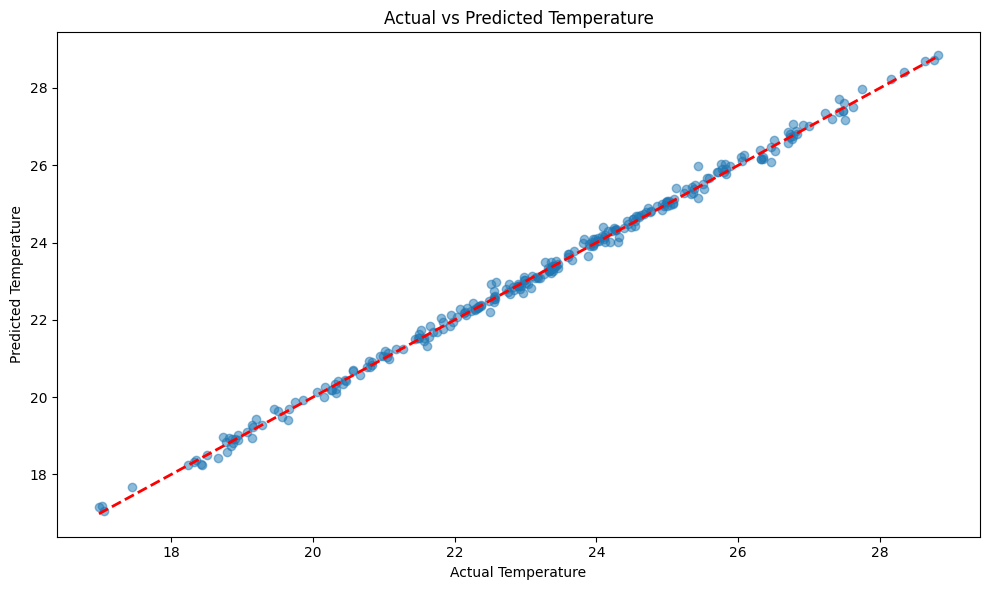

In [42]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.tight_layout()
plt.show()

In [43]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
}
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],  # optional, depending on sklearn version
}

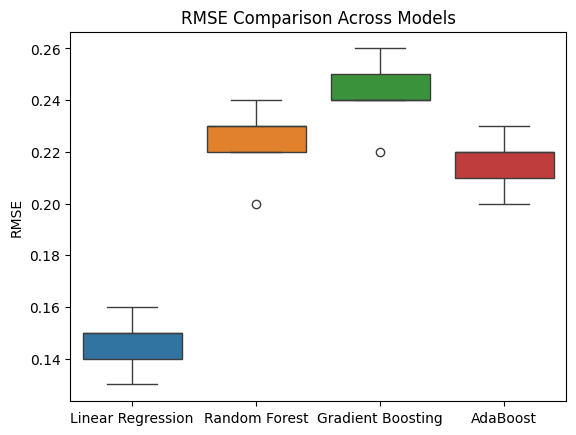

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
rmse_scores = [
    [0.14, 0.16, 0.15, 0.13, 0.15],  # Linear Regression
    [0.24, 0.20, 0.23, 0.22, 0.23],  # Random Forest
    [0.25, 0.26, 0.24, 0.22, 0.24],  # Gradient Boosting
    [0.21, 0.23, 0.22, 0.20, 0.22],  # AdaBoost (example values)
]

# Transpose rmse_scores so each model's RMSEs are grouped
sns.boxplot(data=rmse_scores)
plt.xticks(ticks=range(len(model_names)), labels=model_names)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Models")
plt.show()


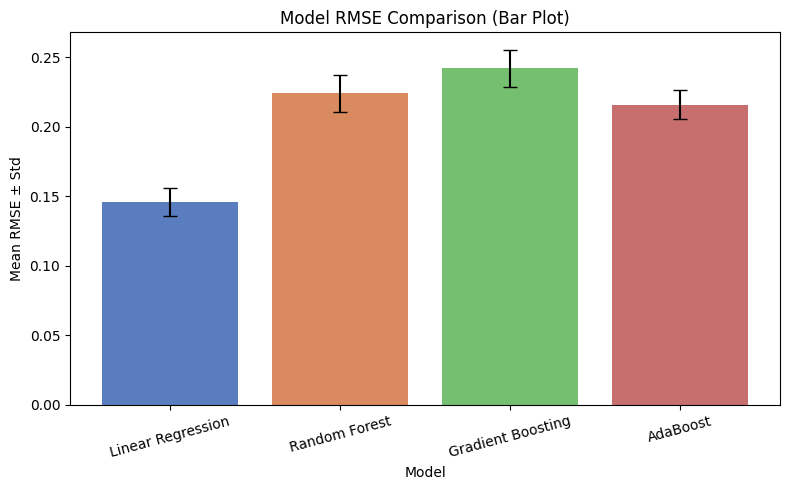

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample RMSE scores
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
rmse_scores = [
    [0.14, 0.16, 0.15, 0.13, 0.15],  # Linear Regression
    [0.24, 0.20, 0.23, 0.22, 0.23],  # Random Forest
    [0.25, 0.26, 0.24, 0.22, 0.24],  # Gradient Boosting
    [0.21, 0.23, 0.22, 0.20, 0.22],  # AdaBoost
]

# Compute means and stds
means = [np.mean(scores) for scores in rmse_scores]
stds = [np.std(scores) for scores in rmse_scores]

# Create a DataFrame for plotting
df1 = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': means,
    'Std_RMSE': stds
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df1, x='Model', y='Mean_RMSE', hue='Model', palette='muted', legend=False)
plt.errorbar(x=np.arange(len(model_names)), y=df1['Mean_RMSE'], yerr=df1['Std_RMSE'],
             fmt='none', c='black', capsize=5)
plt.ylabel("Mean RMSE ± Std")
plt.title("Model RMSE Comparison (Bar Plot)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [46]:
# Try Different Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Compare models using cross-validation
print("Model Comparison (5-fold Cross-Validation):")
print("-" * 50)

Model Comparison (5-fold Cross-Validation):
--------------------------------------------------


In [47]:
# Convert X back to DataFrame for feature names in RandomForest
X_df = pd.DataFrame(X, columns=feature_columns)

for name, model_instance in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model_instance, X, y, 
                               cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative MSE to positive RMSE
    rmse_scores = np.sqrt(-cv_scores)
    
    print(f"{name}:")
    print(f"  RMSE: {rmse_scores.mean():.4f} (±{rmse_scores.std():.4f})")


Linear Regression:
  RMSE: 0.1532 (±0.0236)
Random Forest:
  RMSE: 0.2269 (±0.0890)
Gradient Boosting:
  RMSE: 0.2432 (±0.0988)
AdaBoost:
  RMSE: 0.2957 (±0.1126)


In [72]:
# Train the best model (you can change this based on the results)
best_model = LinearRegression()
best_model.fit(X, y)

# Evaluate on test set
y_pred = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred)
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Mean Absolute Error: {mae_best:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse_best):.4f}")
print(f"R-squared: {r2_best:.4f}")


Best Model Performance on Test Set:
Mean Absolute Error: 0.0975
Root Mean Squared Error: 0.1278
R-squared: 0.9974


In [9]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()


NameError: name 'best_model' is not defined

In [74]:
# Calculate residuals
residuals = y_test - y_pred

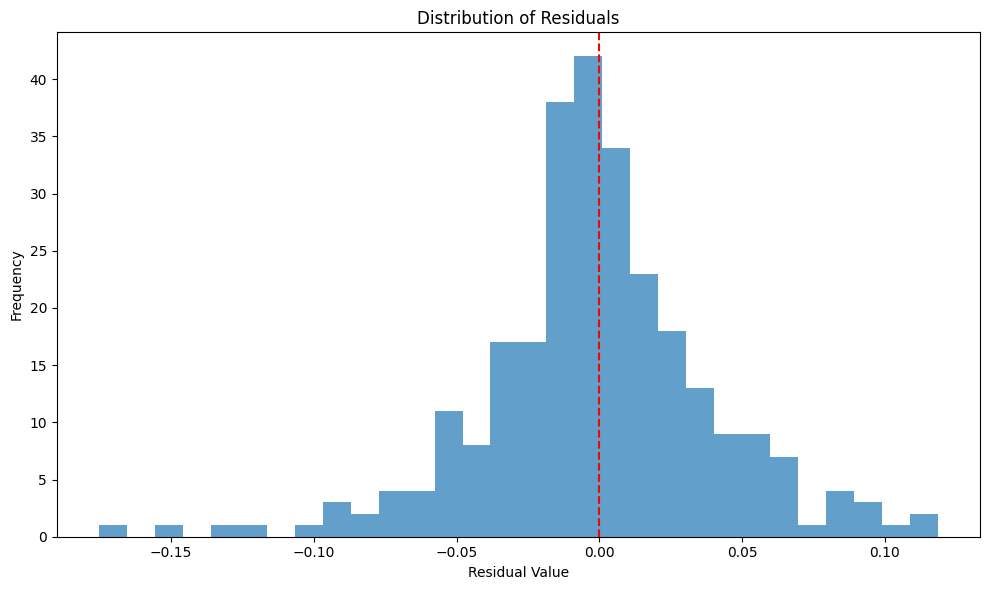

In [51]:
# 1. Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

In [75]:
# 2. Actual vs Predicted over Time (sample)
# Create a small sample for visualization
sample_size = min(100, len(y_test))
indices = np.random.choice(range(len(y_test)), size=sample_size, replace=False)
y_test_sample = np.array(y_test.iloc[indices])
y_pred_sample = np.array(y_pred[indices])

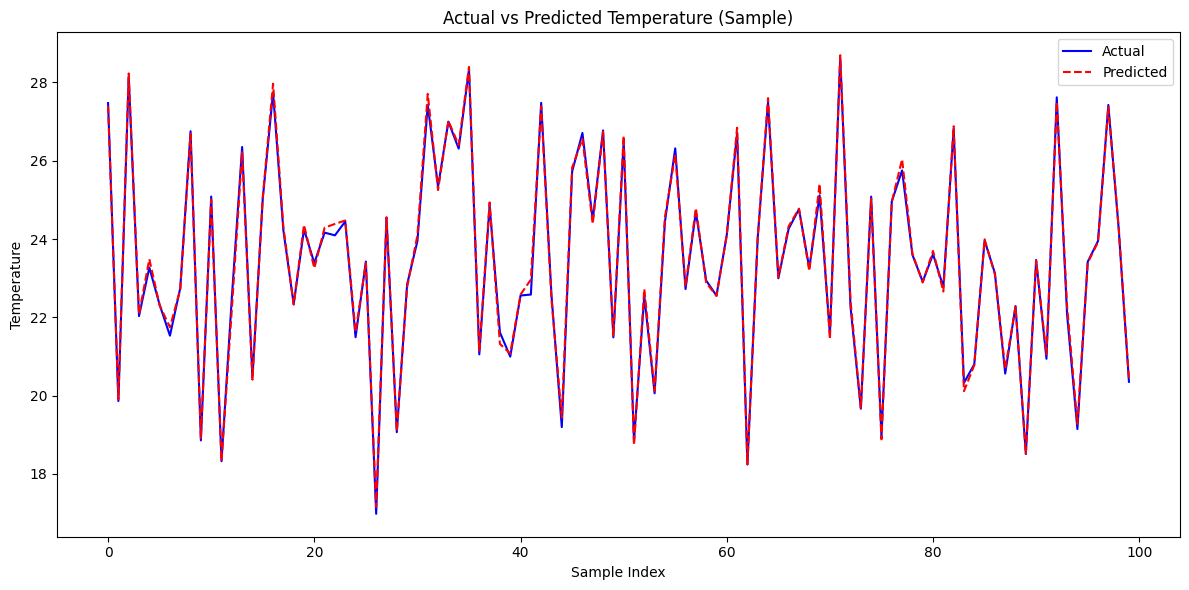

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, 'b-', label='Actual')
plt.plot(range(len(y_pred_sample)), y_pred_sample, 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Sample)')
plt.legend()
plt.tight_layout()
plt.show()

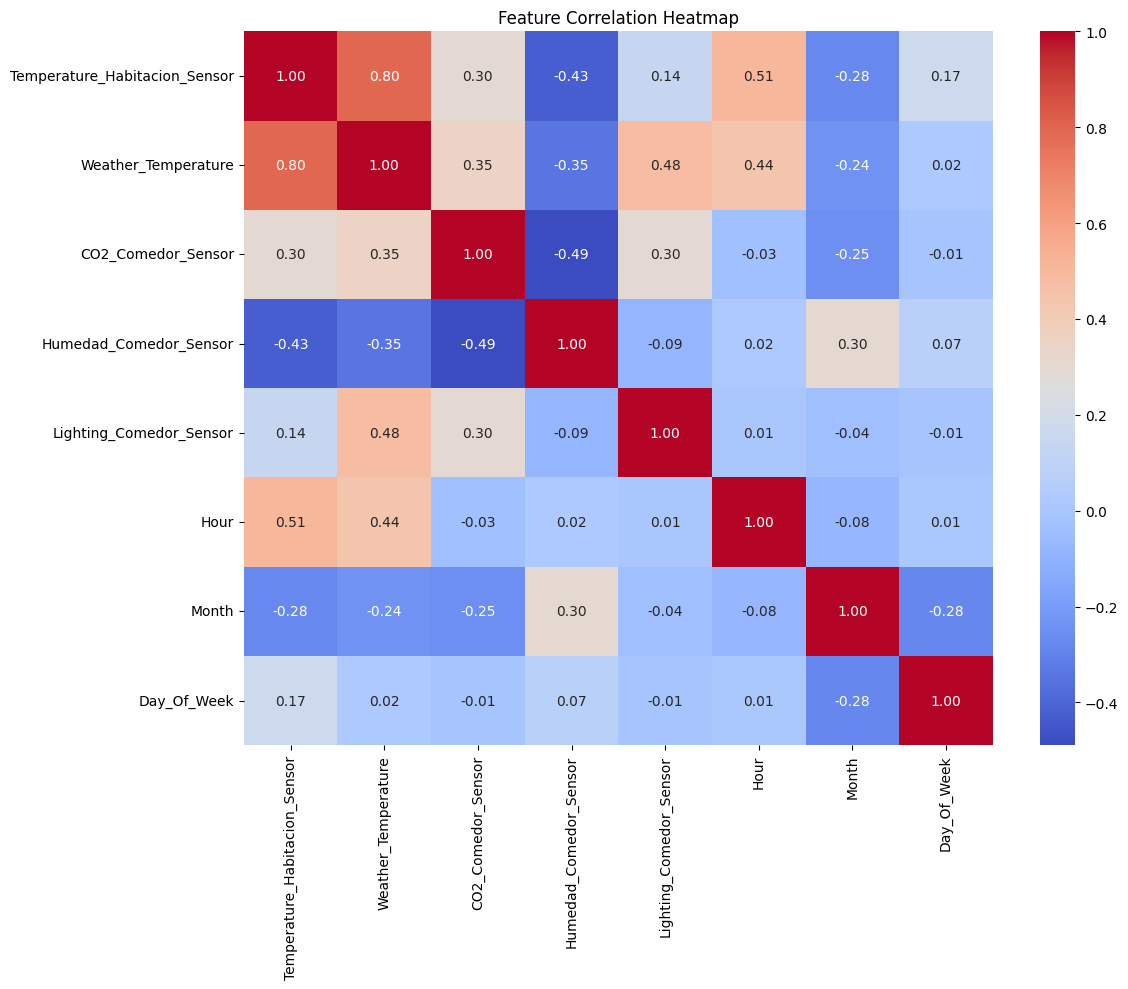

In [77]:
# 3. Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = X_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

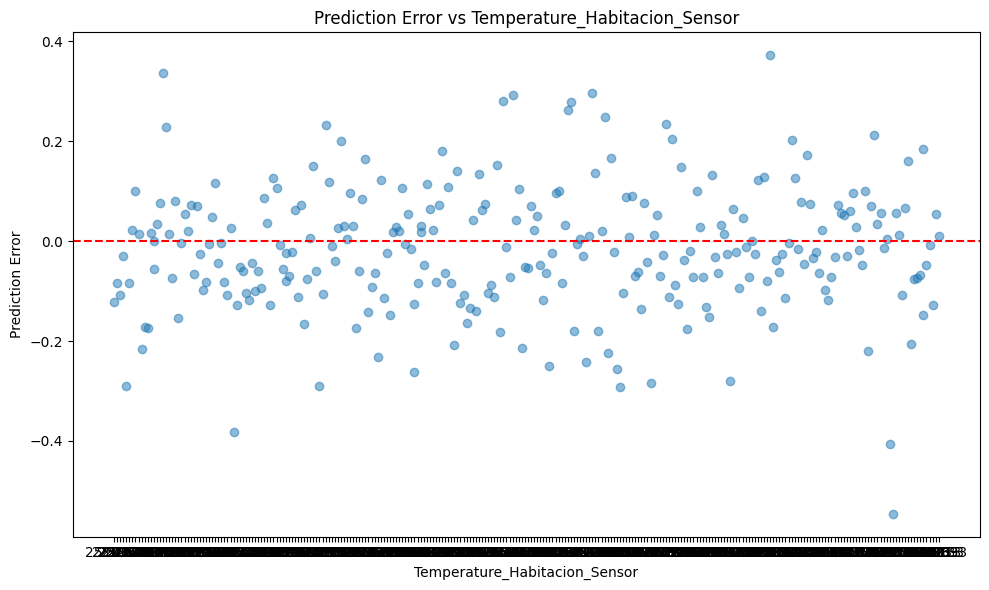

In [78]:
# 4. Prediction Error Distribution by Feature
# Select a feature to analyze (e.g., the most important one)
if len(feature_importance) > 0:
    top_feature = feature_importance.iloc[0]['Feature']
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[top_feature], residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(top_feature)
    plt.ylabel('Prediction Error')
    plt.title(f'Prediction Error vs {top_feature}')
    plt.tight_layout()
    plt.show()

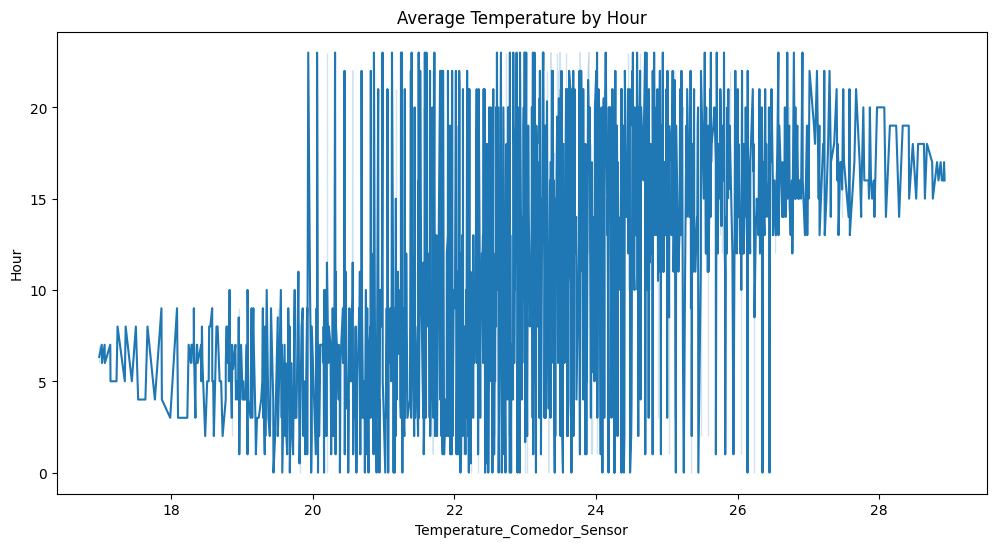

In [79]:
# Hourly patterns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature_Comedor_Sensor', y='Hour', data=df)
plt.title('Average Temperature by Hour')
plt.show()

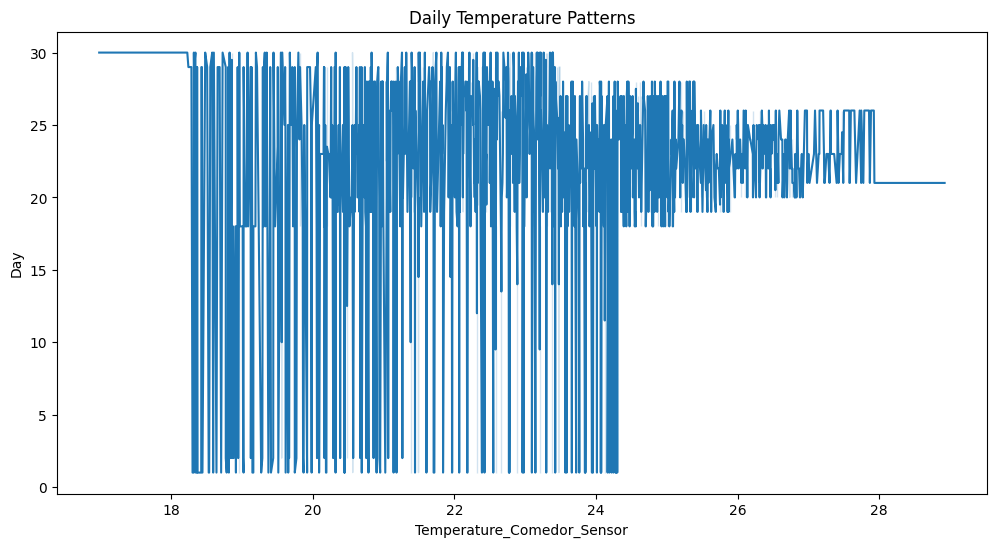

In [80]:
# Daily patterns
df['Day'] = df['Date'].dt.day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature_Comedor_Sensor', y='Day', data=df)
plt.title('Daily Temperature Patterns')
plt.show()

Time-Based Analysis (Hourly): 

In [81]:
# First convert numeric columns to float (if not already done)
numeric_cols = ['Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 
                'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # coerce will turn invalid values to NaN

# Now create interaction features
df['Temp_Ratio'] = df['Temperature_Comedor_Sensor'] / df['Temperature_Habitacion_Sensor']
df['CO2_Humidity'] = df['CO2_Comedor_Sensor'] * df['Humedad_Comedor_Sensor']

# Time-based features
df['Weekend'] = df['Day_Of_Week'].isin([5, 6]).astype(int)
df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)  # 1=Winter, 2=Spring, etc.

# Check the new features
print(df[['Temp_Ratio', 'CO2_Humidity', 'Weekend', 'Season']].head())

   Temp_Ratio  CO2_Humidity  Weekend  Season
0    1.020202   6563.587200        0       2
1    1.020207   6561.948376        0       2
2    1.021162   6563.089152        0       2
3    1.020119   6575.736821        0       2
4    1.020169   6603.222288        0       2


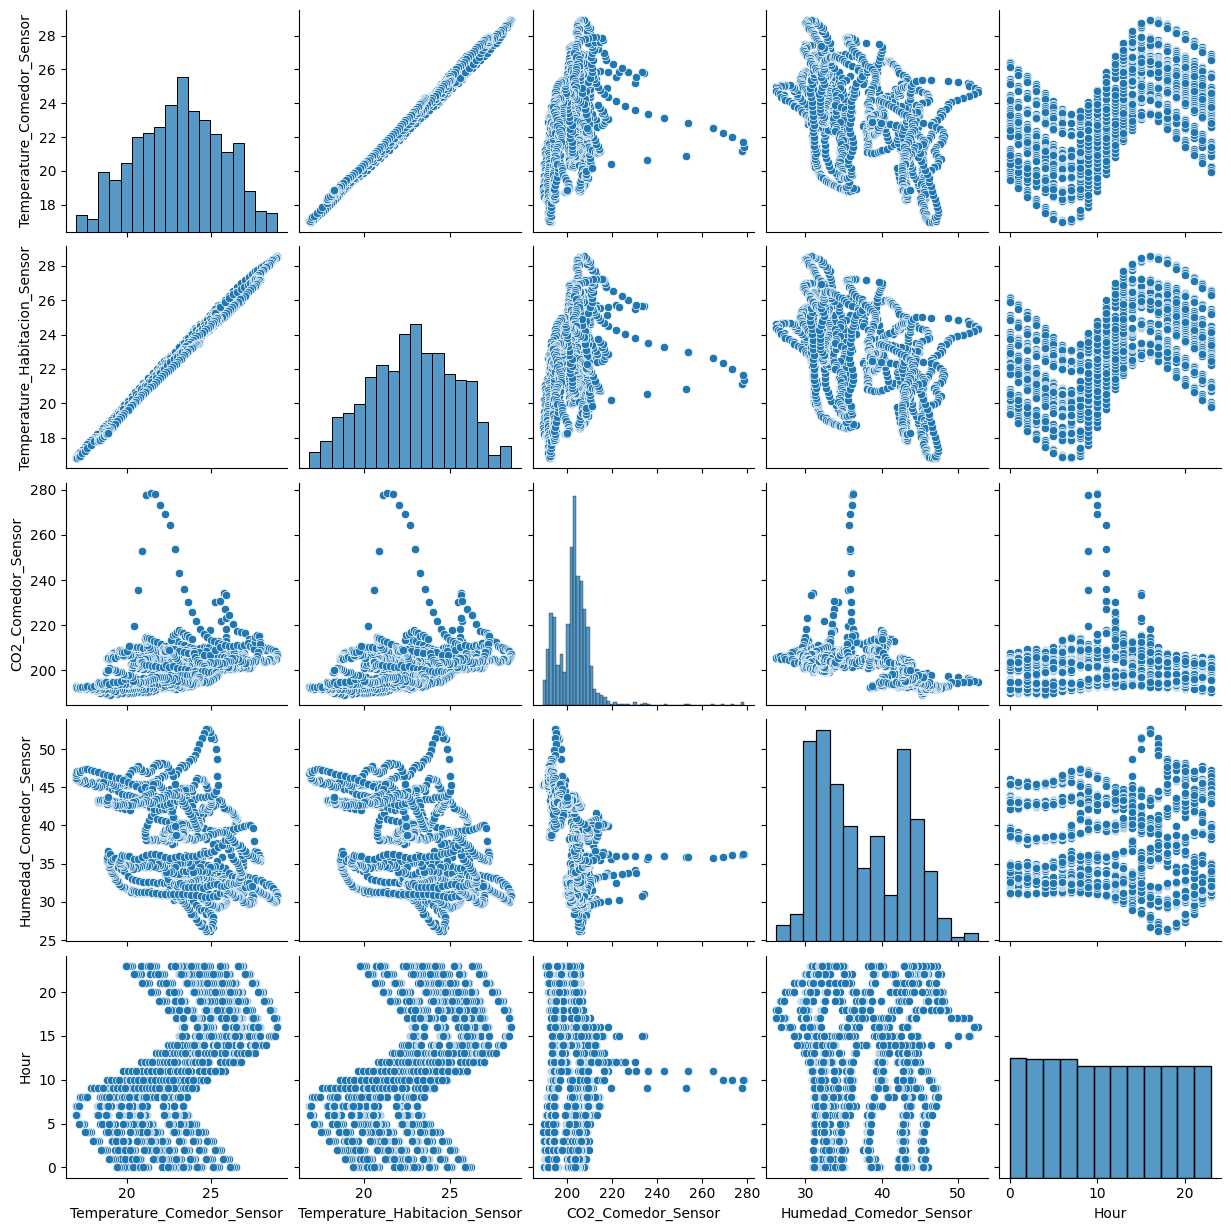

In [82]:
# Pairplot for feature relationships
sns.pairplot(df[['Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 
                'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor', 'Hour']])
plt.show()


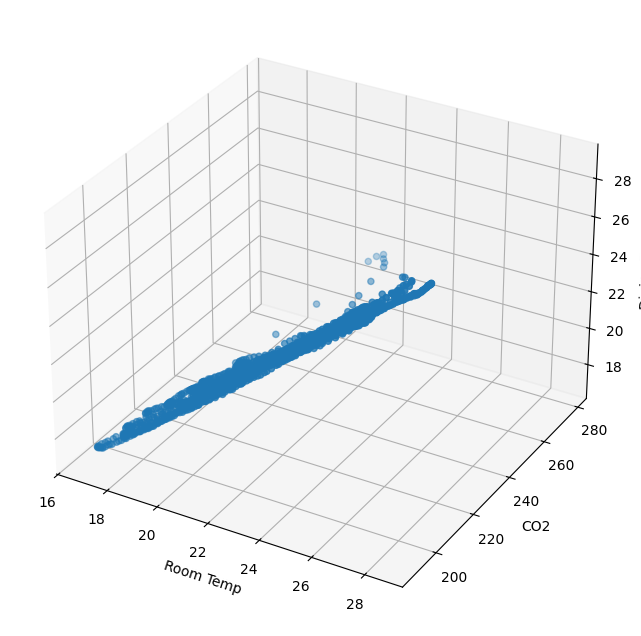

In [83]:
# 3D plot (requires matplotlib 3D axes)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature_Habitacion_Sensor'], 
           df['CO2_Comedor_Sensor'], 
           df['Temperature_Comedor_Sensor'])
ax.set_xlabel('Room Temp')
ax.set_ylabel('CO2')
ax.set_zlabel('Dining Temp')
plt.show()

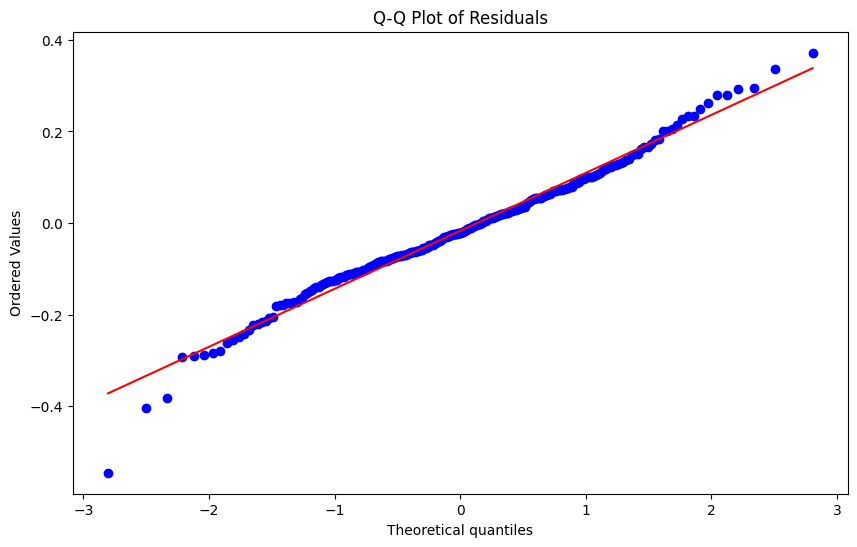

In [84]:
# Residual analysis
import scipy.stats as stats
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


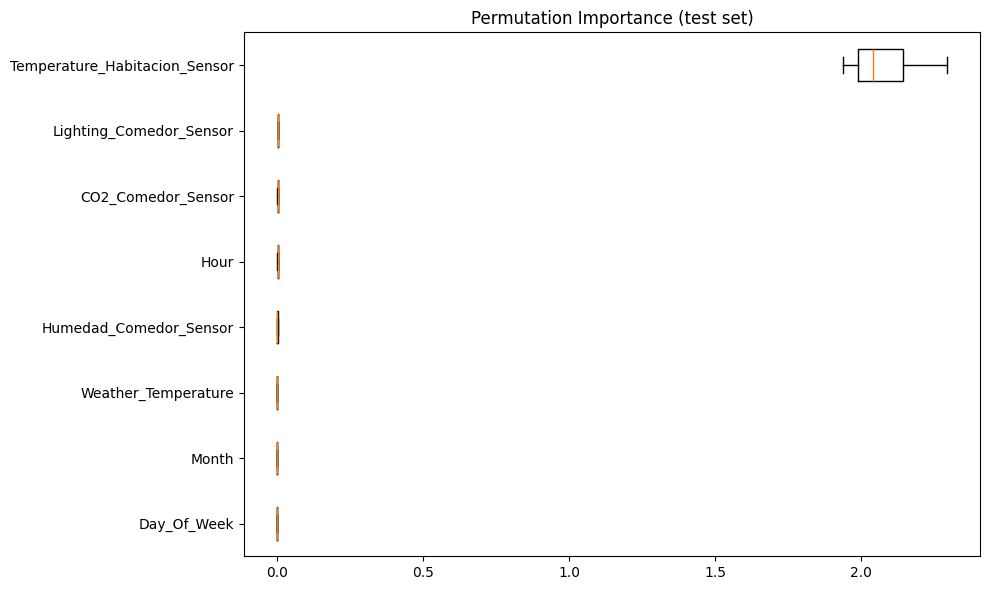

In [62]:
# Feature importance analysis (compatible with NumPy 2.2)
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

# 1. Permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=np.array(feature_columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()


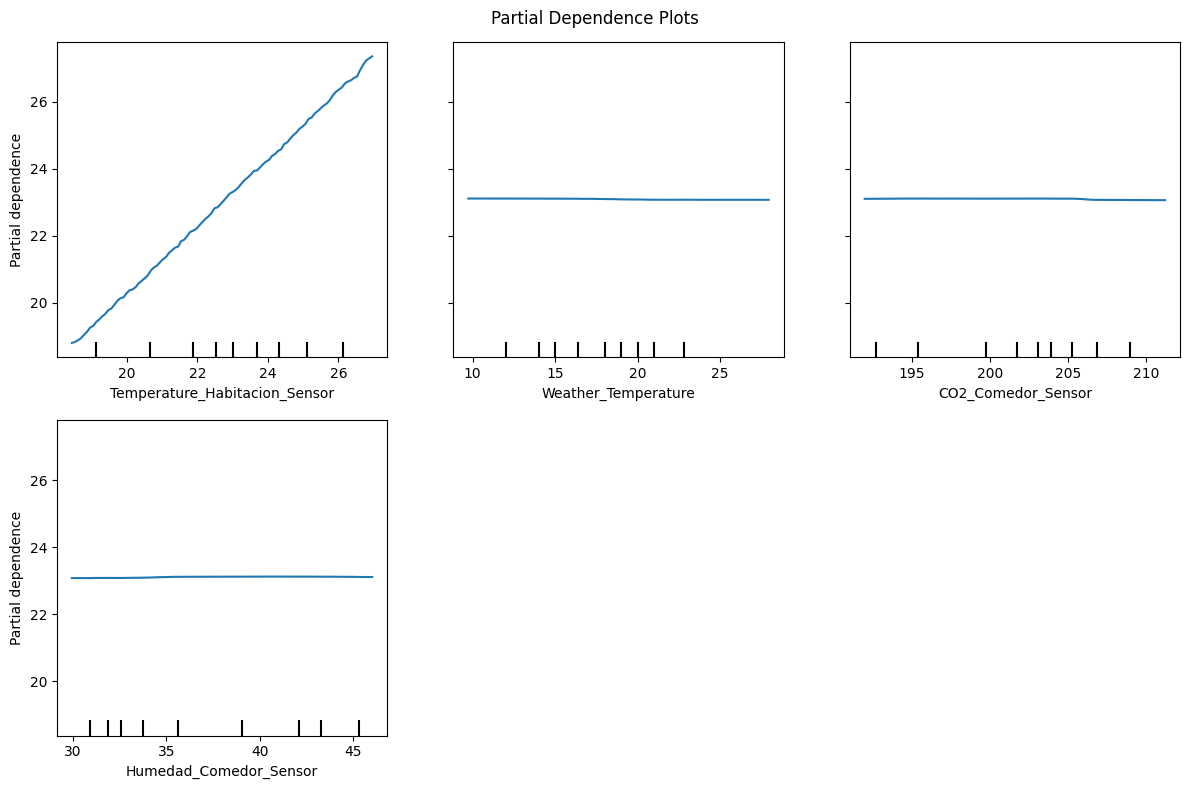

In [63]:
# 2. Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
# Convert data to float to avoid type errors
X_test_float = X_test.astype(float)
PartialDependenceDisplay.from_estimator(best_model, X_test_float, 
                                      features=[0, 1, 2, 3], 
                                      feature_names=feature_columns,
                                      ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

In [85]:

# 3. Feature Importance (built-in)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    indices = np.argsort(importance)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance (Gini Importance)")
    plt.bar(range(X_test.shape[1]), importance[indices], align="center")
    plt.xticks(range(X_test.shape[1]), np.array(feature_columns)[indices], rotation=45)
    plt.xlim([-1, X_test.shape[1]])
    plt.tight_layout()
    plt.show()

In [86]:
# Environmental Analysis
print("\n=== Environmental Analysis ===")

# First, convert numeric columns to float
numeric_columns = [
    'Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor',
    'Temperature_Exterior_Sensor', 'CO2_Comedor_Sensor',
    'CO2_Habitacion_Sensor', 'Humedad_Comedor_Sensor',
    'Humedad_Habitacion_Sensor', 'Humedad_Exterior_Sensor',
    'Lighting_Comedor_Sensor', 'Lighting_Habitacion_Sensor',
    'Weather_Temperature'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Exterior vs Interior Temperature Analysis
df['Temp_Diff_Comedor'] = df['Temperature_Comedor_Sensor'] - df['Temperature_Exterior_Sensor']
df['Temp_Diff_Habitacion'] = df['Temperature_Habitacion_Sensor'] - df['Temperature_Exterior_Sensor']

# Calculate average temperature differences by hour
temp_diff_hourly = df.groupby('Hour').agg({
    'Temp_Diff_Comedor': 'mean',
    'Temp_Diff_Habitacion': 'mean',
    'Temperature_Exterior_Sensor': 'mean'
}).round(2)

print("\nAverage Temperature Differences by Hour:")
print(temp_diff_hourly)




=== Environmental Analysis ===

Average Temperature Differences by Hour:
      Temp_Diff_Comedor  Temp_Diff_Habitacion  Temperature_Exterior_Sensor
Hour                                                                      
0                  4.39                  4.07                        18.21
1                  4.44                  4.13                        17.74
2                  4.47                  4.17                        17.29
3                  4.40                  4.11                        16.99
4                  4.38                  4.09                        16.63
5                  4.38                  4.08                        16.23
6                  4.04                  3.75                        16.29
7                  3.20                  2.89                        17.12
8                  1.94                  1.67                        18.75
9                  0.70                  0.50                        20.64
10                -0.15   

In [87]:
# 2. CO2 and Occupancy Analysis
df['CO2_Diff'] = df['CO2_Comedor_Sensor'] - df['CO2_Habitacion_Sensor']
df['Avg_CO2'] = (df['CO2_Comedor_Sensor'] + df['CO2_Habitacion_Sensor']) / 2

# Calculate occupancy patterns
co2_hourly = df.groupby('Hour').agg({
    'CO2_Comedor_Sensor': 'mean',
    'CO2_Habitacion_Sensor': 'mean',
    'Avg_CO2': 'mean'
}).round(2)

print("\nCO2 Levels by Hour (indicating occupancy patterns):")
print(co2_hourly)




CO2 Levels by Hour (indicating occupancy patterns):
      CO2_Comedor_Sensor  CO2_Habitacion_Sensor  Avg_CO2
Hour                                                    
0                 200.65                 205.26   202.95
1                 200.43                 205.18   202.80
2                 200.79                 205.77   203.28
3                 201.18                 205.91   203.54
4                 201.59                 206.33   203.96
5                 202.02                 206.69   204.36
6                 202.48                 207.04   204.76
7                 202.90                 206.46   204.68
8                 203.52                 206.10   204.81
9                 206.53                 211.73   209.13
10                209.24                 210.69   209.96
11                209.19                 209.34   209.27
12                207.10                 207.58   207.34
13                205.48                 206.78   206.13
14                204.44           

In [88]:
# 3. Humidity Analysis
df['Humidity_Diff_Comedor'] = df['Humedad_Comedor_Sensor'] - df['Humedad_Exterior_Sensor']
df['Humidity_Diff_Habitacion'] = df['Humedad_Habitacion_Sensor'] - df['Humedad_Exterior_Sensor']

# Calculate humidity patterns
humidity_hourly = df.groupby('Hour').agg({
    'Humidity_Diff_Comedor': 'mean',
    'Humidity_Diff_Habitacion': 'mean',
    'Humedad_Exterior_Sensor': 'mean'
}).round(2)

print("\nHumidity Differences by Hour:")
print(humidity_hourly)



Humidity Differences by Hour:
      Humidity_Diff_Comedor  Humidity_Diff_Habitacion  Humedad_Exterior_Sensor
Hour                                                                          
0                    -15.17                    -12.99                    52.53
1                    -16.18                    -13.75                    53.48
2                    -16.79                    -14.16                    54.10
3                    -17.22                    -14.38                    54.41
4                    -17.69                    -14.72                    54.85
5                    -18.45                    -15.38                    55.87
6                    -17.94                    -14.93                    55.58
7                    -15.29                    -12.69                    53.16
8                    -11.88                    -10.08                    49.54
9                     -8.63                     -7.24                    46.02
10                   

In [89]:
# 4. Lighting and Temperature Correlation
lighting_temp_corr = df.groupby('Hour').agg({
    'Lighting_Comedor_Sensor': 'mean',
    'Temperature_Comedor_Sensor': 'mean',
    'Lighting_Habitacion_Sensor': 'mean',
    'Temperature_Habitacion_Sensor': 'mean'
}).round(2)

print("\nLighting and Temperature Correlation by Hour:")
print(lighting_temp_corr)



Lighting and Temperature Correlation by Hour:
      Lighting_Comedor_Sensor  Temperature_Comedor_Sensor  \
Hour                                                        
0                       11.57                       22.60   
1                       11.56                       22.18   
2                       11.57                       21.76   
3                       11.60                       21.39   
4                       11.61                       21.00   
5                       14.91                       20.61   
6                       21.18                       20.33   
7                       30.31                       20.32   
8                       50.60                       20.69   
9                       73.26                       21.34   
10                      81.43                       22.22   
11                      84.55                       23.16   
12                      81.84                       24.05   
13                      78.90         

Weather Impact: 

In [90]:
# 5. Weather Impact Analysis
weather_impact = df.groupby('Weather_Temperature').agg({
    'Temperature_Comedor_Sensor': 'mean',
    'Temperature_Habitacion_Sensor': 'mean',
    'Humedad_Comedor_Sensor': 'mean',
    'Humedad_Habitacion_Sensor': 'mean'
}).round(2)

print("\nWeather Impact on Interior Conditions:")
print(weather_impact)


Weather Impact on Interior Conditions:
                     Temperature_Comedor_Sensor  \
Weather_Temperature                               
9.00000                                   18.41   
9.06667                                   18.53   
9.73333                                   18.35   
10.00000                                  19.59   
10.33330                                  19.61   
...                                         ...   
26.06670                                  25.52   
27.00000                                  25.82   
27.93330                                  26.09   
28.00000                                  26.75   
29.00000                                  26.43   

                     Temperature_Habitacion_Sensor  Humedad_Comedor_Sensor  \
Weather_Temperature                                                          
9.00000                                      18.00                   43.06   
9.06667                                      18.12            

Predictions: [20.274166 20.224217 20.098202 ... 18.591569 18.540567 18.435207]


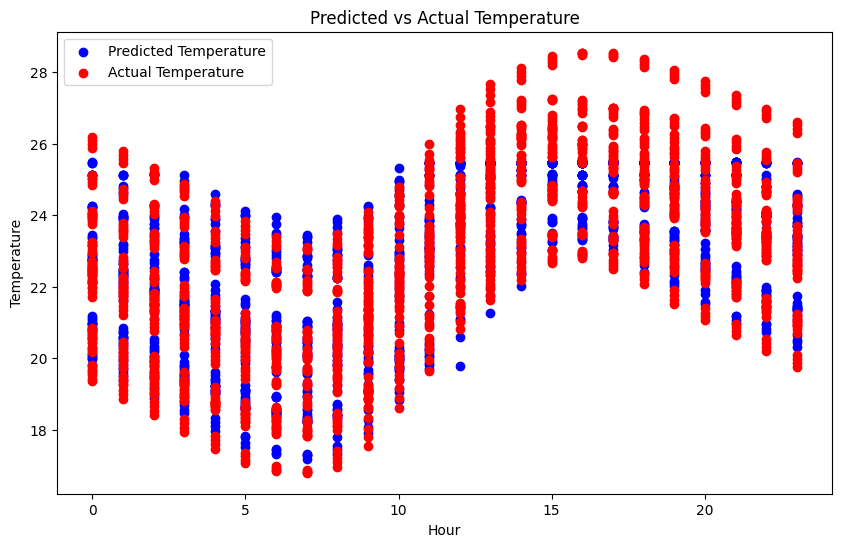

In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from data_loader import load_df2


# Load new data for prediction
X_new = load_df2()


# Load the saved model
model = joblib.load('linear_regression_model.pkl')

features_used = ['Temperature_Habitacion_Sensor',
                 'Weather_Temperature',
                 'CO2_Comedor_Sensor',
                 'Humedad_Comedor_Sensor',
                 'Lighting_Comedor_Sensor',
                 'Hour',
                 'Month',
                 'Day_Of_Week']
X_input = X_new[features_used]

predictions = model.predict(X_input)

print("Predictions:", predictions)
plt.figure(figsize=(10, 6))
plt.scatter(X_new['Hour'], predictions, color='blue', label='Predicted Temperature')
plt.scatter(X_new['Hour'], X_new['Temperature_Habitacion_Sensor'], color='red', label='Actual Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Predicted vs Actual Temperature')
plt.legend()
plt.show()

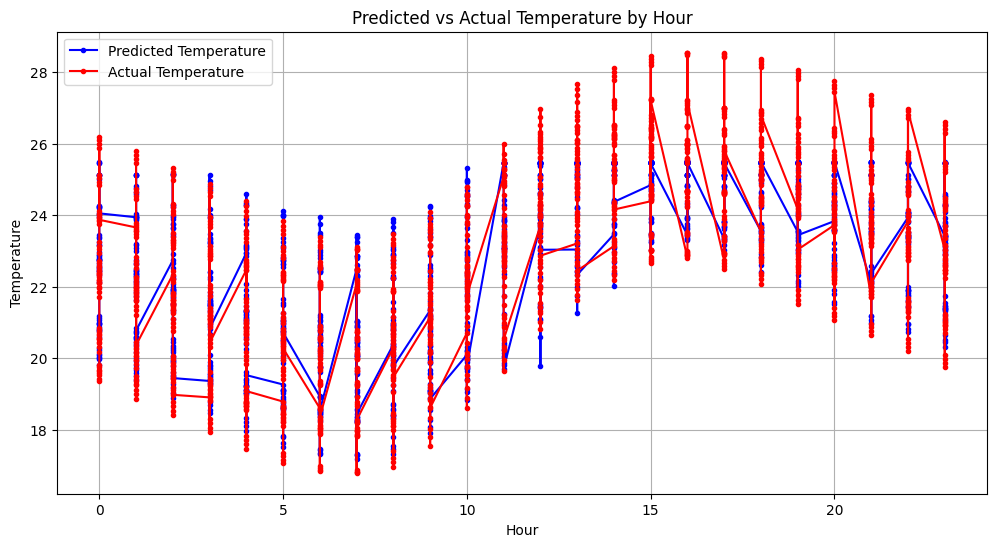

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Add predictions to DataFrame
X_new['Predicted_Temp'] = predictions

# Sort by Hour for smooth plotting
X_sorted = X_new.sort_values(by='Hour')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(X_sorted['Hour'], X_sorted['Predicted_Temp'], 'b.-', label='Predicted Temperature')
plt.plot(X_sorted['Hour'], X_sorted['Temperature_Habitacion_Sensor'], 'r.-', label='Actual Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Predicted vs Actual Temperature by Hour')
plt.legend()
plt.grid(True)
plt.show()


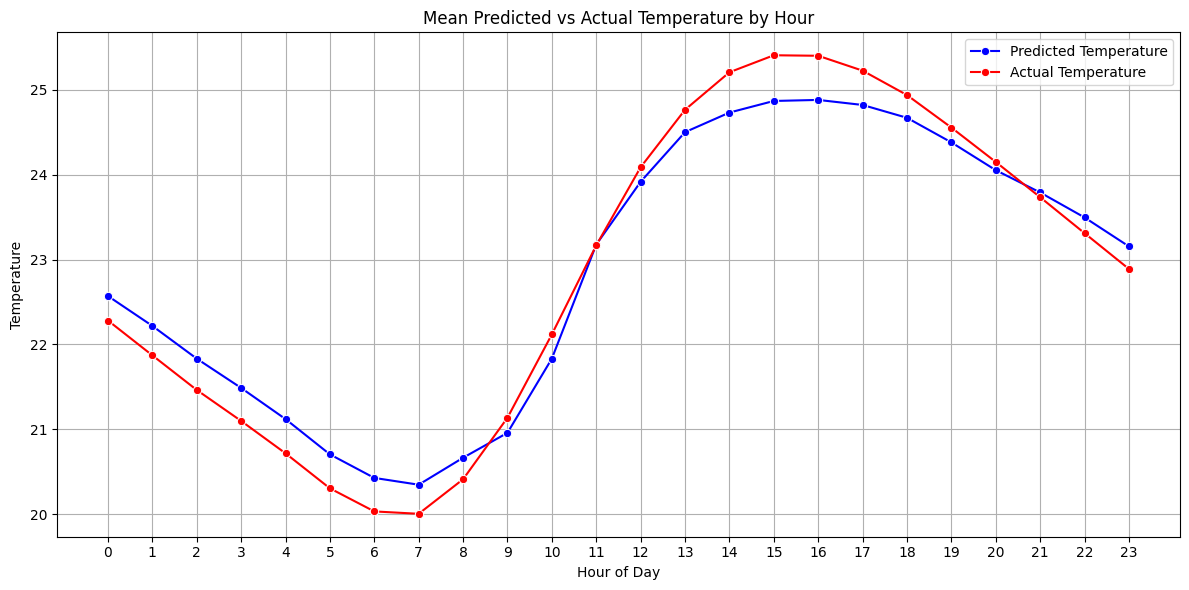

In [7]:
import seaborn as sns

# Group by Hour and calculate mean values
grouped = X_new.groupby('Hour')[['Temperature_Habitacion_Sensor', 'Predicted_Temp']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Hour', y='Predicted_Temp', label='Predicted Temperature', marker='o', color='blue')
sns.lineplot(data=grouped, x='Hour', y='Temperature_Habitacion_Sensor', label='Actual Temperature', marker='o', color='red')
plt.title('Mean Predicted vs Actual Temperature by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.xticks(range(0, 24))  # if using 24-hour time
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


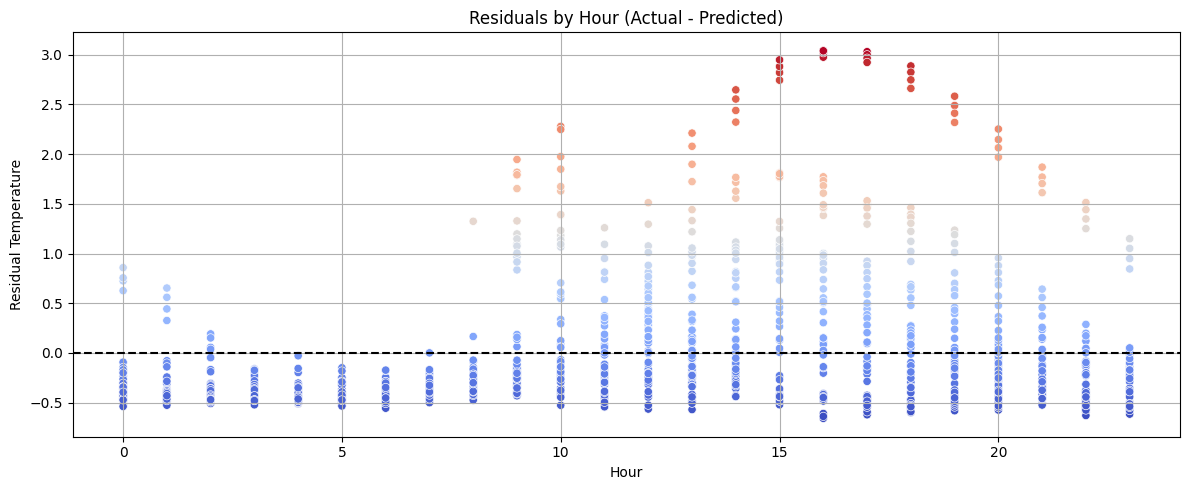

In [8]:
X_new['Residuals'] = X_new['Temperature_Habitacion_Sensor'] - X_new['Predicted_Temp']

plt.figure(figsize=(12, 5))
sns.scatterplot(data=X_new, x='Hour', y='Residuals', hue='Residuals', palette='coolwarm', legend=False)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals by Hour (Actual - Predicted)')
plt.xlabel('Hour')
plt.ylabel('Residual Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()
